# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set,  which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.  

## Objectives
You will be able to:
* Show mastery of the content covered in this section

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
plt.style.available
plt.style.use('bmh')

In [2]:
df = pd.read_csv('train.csv')
# df = pd.DataFrame(data)
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [4]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


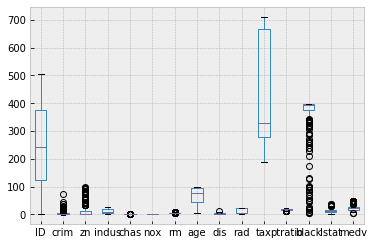

In [5]:
df.plot.box()

# Series Selection

Series where the standard deviation exceeds the mean and/or median suggest mean the dispersion is greater than the average, and in these scenarios, we should look for distinct data sets with different characteristics. Comparing this data with the results in the box plots suggests 3 main categories that are likely suitable for a split:

* Crime Rates (high/low based on .75 percentile): Low crime expected to be more expensive.
* Zoned (Has areas zoned for large lots or not): Large lots are likely outliers that skew the data upwards.
* Charles River (Home is on river): Homes on the river likely to be more expensive on the whole.

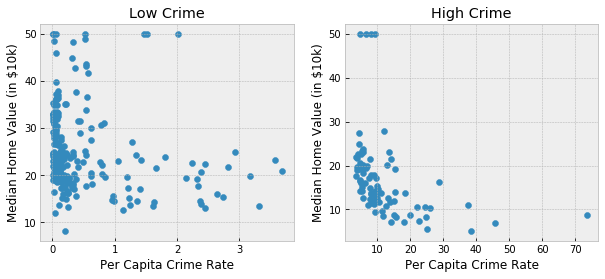

In [6]:
crime_low = df.loc[df['crim'] <= df['crim'].quantile(.75), ['crim', 'medv']]
crime_high = df.loc[df['crim'] > df['crim'].quantile(.75), ['crim', 'medv']]

crime_fig = plt.figure(figsize=(10, 4))
crim_axL = crime_fig.add_subplot(121)
crim_axL.scatter(crime_low['crim'], crime_low['medv'])
crim_axL.set_title("Low Crime")
crim_axL.set_xlabel("Per Capita Crime Rate")
crim_axL.set_ylabel("Median Home Value (in $10k)")

crim_axH = crime_fig.add_subplot(122)
crim_axH.scatter(crime_high['crim'], crime_high['medv'])
crim_axH.set_title("High Crime")
crim_axH.set_xlabel("Per Capita Crime Rate")
crim_axH.set_ylabel("Median Home Value (in $10k)")

plt.show()

In [7]:
print('Low Crime Neighborhoods')
print(' Mean Home Price: $' + str(round(crime_low['medv'].mean(), 1)))
print(' Median Home Price: $' + str(round(crime_low['medv'].median(), 1)))
print(' Standard Deviation: ' + str(round(crime_low['medv'].std(), 1)))
print('\nHigh Crime Neighborhoods')
print(' Mean Home Price: $' + str(round(crime_high['medv'].mean(), 1)))
print(' Median Home Price: $' + str(round(crime_high['medv'].median(), 1)))
print(' Standard Deviation: ' + str(round(crime_high['medv'].std(), 1)))
print('\nAll Neighborhoods')
print(' Mean Home Price: $' + str(round(df['medv'].mean(), 1)))
print(' Median Home Price: $' + str(round(df['medv'].median(), 1)))
print(' Standard Deviation: ' + str(round(df['medv'].std(), 1)))
print('\nHome prices in neighborhoods with low crime are nearly double those with high crime.')
print('Using the standard deviation as a measure of dispersion, we can see that this split \nmakes for a better predictor of home price.')

Low Crime Neighborhoods
 Mean Home Price: $24.7
 Median Home Price: $22.9
 Standard Deviation: 8.3

High Crime Neighborhoods
 Mean Home Price: $16.8
 Median Home Price: $14.6
 Standard Deviation: 9.1

All Neighborhoods
 Mean Home Price: $22.8
 Median Home Price: $21.6
 Standard Deviation: 9.2

Home prices in neighborhoods with low crime are nearly double those with high crime.
Using the standard deviation as a measure of dispersion, we can see that this split 
makes for a better predictor of home price.


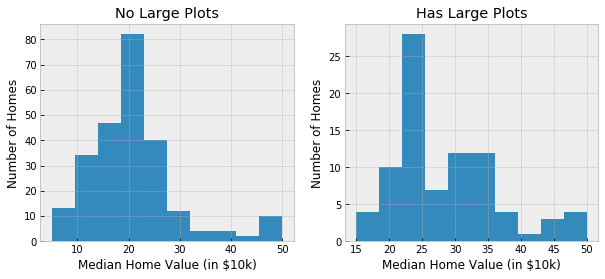

In [15]:
no_large_plots = df.loc[df['zn'] == 0, ['zn', 'medv']]
has_large_plots = df.loc[df['zn'] > 0, ['zn', 'medv']]

zone_fig = plt.figure(figsize=(10, 4))
zone_axN = zone_fig.add_subplot(121)
zone_axN.hist(no_large_plots['medv'])
zone_axN.set_title("No Large Plots")
zone_axN.set_xlabel("Median Home Value (in $10k)")
zone_axN.set_ylabel("Number of Homes")

zone_axH = zone_fig.add_subplot(122)
zone_axH.hist(has_large_plots['medv'])
zone_axH.set_title("Has Large Plots")
zone_axH.set_xlabel("Median Home Value (in $10k)")
zone_axH.set_ylabel("Number of Homes")

plt.show()

In [9]:
print('No Large Plots')
print(' Mean Home Price: $' + str(round(no_large_plots['medv'].mean(), 1)))
print(' Median Home Price: $' + str(round(no_large_plots['medv'].median(), 1)))
print(' Standard Deviation: ' + str(round(no_large_plots['medv'].std(), 1)))
print('\nHas Large Plots')
print(' Mean Home Price: $' + str(round(has_large_plots['medv'].mean(), 1)))
print(' Median Home Price: $' + str(round(has_large_plots['medv'].median(), 1)))
print(' Standard Deviation: ' + str(round(has_large_plots['medv'].std(), 1)))
print('\nAll Zones')
print(' Mean Home Price: $' + str(round(df['medv'].mean(), 1)))
print(' Median Home Price: $' + str(round(df['medv'].median(), 1)))
print(' Standard Deviation: ' + str(round(df['medv'].std(), 1)))
print('\nHome prices in neighborhoods with large plot zones are approx 40% higher than those without.')
print('Using the standard deviation as a measure of dispersion, we can see that this split \nmakes for a better predictor of home price.')

No Large Plots
 Mean Home Price: $20.8
 Median Home Price: $19.9
 Standard Deviation: 8.7

Has Large Plots
 Mean Home Price: $28.4
 Median Home Price: $26.2
 Standard Deviation: 8.1

All Zones
 Mean Home Price: $22.8
 Median Home Price: $21.6
 Standard Deviation: 9.2

Home prices in neighborhoods with large plot zones are approx 40% higher than those without.
Using the standard deviation as a measure of dispersion, we can see that this split 
makes for a better predictor of home price.


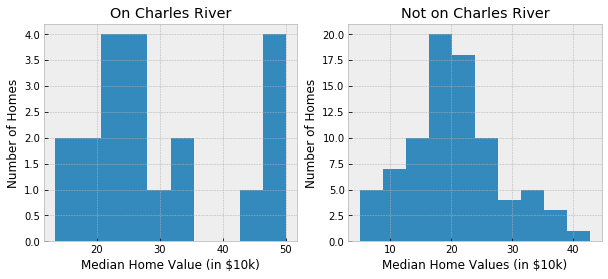

In [17]:
on_river = df.loc[df['chas'] == 1, ['chas', 'medv']]
off_river = df.loc[df['chas'] == 0, ['chas', 'medv']]

chas_fig = plt.figure(figsize=(10, 4))
chas_axY = chas_fig.add_axes(121)
chas_axY.hist(on_river['medv'])
chas_axY.set_title("On Charles River")
chas_axY.set_xlabel("Median Home Value (in $10k)")
chas_axY.set_ylabel("Number of Homes")

chas_axN = chas_fig.add_subplot(122)
chas_axN.hist(high_black_pop['medv'])
chas_axN.set_title("Not on Charles River")
chas_axN.set_xlabel("Median Home Values (in $10k)")
chas_axN.set_ylabel("Number of Homes")

plt.show()

In [21]:
print('On Charles River')
print(' Mean Home Price: $' + str(round(on_river['medv'].mean(), 1)))
print(' Median Home Price: $' + str(round(on_river['medv'].median(), 1)))
print(' Standard Deviation: ' + str(round(on_river['medv'].std(), 1)))
print('\nNot on Charles River')
print(' Mean Home Price: $' + str(round(off_river['medv'].mean(), 1)))
print(' Median Home Price: $' + str(round(off_river['medv'].median(), 1)))
print(' Standard Deviation: ' + str(round(off_river['medv'].std(), 1)))
print('\nAll Homes')
print(' Mean Home Price: $' + str(round(df['medv'].mean(), 1)))
print(' Median Home Price: $' + str(round(df['medv'].median(), 1)))
print(' Standard Deviation: ' + str(round(df['medv'].std(), 1)))
print('\nHomes on the river bank are approximately 35% more expensive. However, the deviation in home prices is greater.')
print('If a home is not on the river, the price can be predicted more effectively and is likely to be less than a \nhome on the river.')

On Charles River
 Mean Home Price: $30.2
 Median Home Price: $26.1
 Standard Deviation: 12.4

Not on Charles River
 Mean Home Price: $22.3
 Median Home Price: $21.2
 Standard Deviation: 8.7

All Homes
 Mean Home Price: $22.8
 Median Home Price: $21.6
 Standard Deviation: 9.2

Homes on the river bank are approximately 35% more expensive. However, the deviation in home prices is greater.
If a home is not on the river, the price can be predicted more effectively and is likely to be less than a 
home on the river.


## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!